In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [10]:
import tensorflow as tf
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from keras.layers import  Dropout, Dense
import matplotlib.pyplot as plt
from keras.models import Sequential
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from keras import optimizers
from keras import layers
from keras.preprocessing.text import Tokenizer      
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, svm
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import nltk
from sklearn import metrics
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('stopwords')
import matplotlib
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**BASIC DEAP LEARNING MODEL**

In [0]:
df = pd.read_csv("/content/gdrive/My Drive/dataset/data.txt", delimiter=',',encoding = "utf-8")

In [0]:
df['text'] = [entry.lower() for entry in df['text']]
df['text']= [word_tokenize(entry) for entry in df['text']]

In [0]:
Corpus  = df
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV
for index,entry in enumerate(Corpus['text']):
    Final_words = []
    word_Lemmatized = WordNetLemmatizer()
    for word, tag in pos_tag(entry):
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    Corpus.loc[index,'text'] = str(Final_words)
Corpus.head()

Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(Corpus['text'],Corpus['label'],test_size=0.1)
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(Corpus['text'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

In [0]:
def Build_Model_DNN_Text(shape, nClasses, dropout=0.5):
  
    model = Sequential()
    node = 512 
    nLayers = 4 
    model.add(Dense(node,input_dim=shape,activation='relu'))
    model.add(Dropout(dropout))
    for i in range(0,nLayers):
        model.add(Dense(node,input_dim=node,activation='relu'))
        model.add(Dropout(dropout))
    model.add(Dense(nClasses, activation='softmax'))
    return model


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 5398 samples, validate on 600 samples
Epoch 1/10
 - 3s - loss: 0.3897 - acc: 0.8296 - val_loss: 0.2601 - val_acc: 0.9133
Epoch 2/10
 - 2s - loss: 0.1996 - acc: 0.9370 - val_loss: 0.2432 - val_acc: 0.9183
Epoch 3/10
 - 2s - loss: 0.1185 - acc: 0.9639 - val_loss: 0.3425 - val_acc: 0.9250
Epoch 4/10
 - 2s - loss: 0.0843 - acc: 0.9778 - val_loss: 0.3591 - val_acc: 0.9167
Epoch 5/10
 - 2s - loss: 0.0606 - acc: 0.9826 - val_loss: 0.3723 - val_acc: 0.9233
Epoch 6/10
 - 2s - loss: 0.0474 - acc: 0.9835 - val_loss: 0.5226 - val_acc: 0.9150
Epoch 7/10
 - 2s - loss: 0.0486 - acc: 0.9833 - val_loss: 0.5329 - val_acc: 0.9200
Epoch 8/10
 - 2s - loss: 0.0412 - acc: 0.9850 - val_loss: 0.5113 - val_acc: 0.9217
Epoch 9/10
 - 2s - loss: 0.0518 - acc: 0.9850 - val_loss: 0.6540 - val_acc: 0.9267
Epoch 10/10
 - 2s - loss: 0.0437 - acc: 0.9844 - val_loss: 0.6327 - val_acc: 0.9083


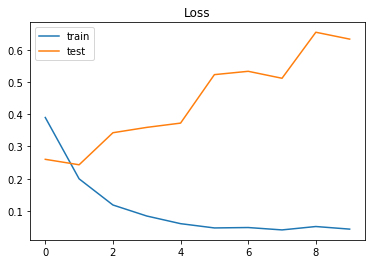

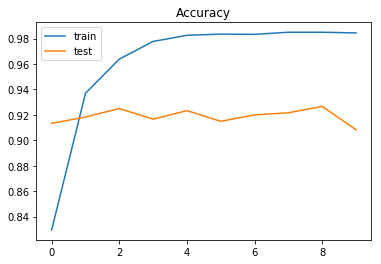

In [15]:
model_DNN = Build_Model_DNN_Text(Train_X_Tfidf.shape[1], 2)
model_DNN.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy']) 
history = model_DNN.fit(Train_X_Tfidf, Train_Y,validation_data=(Test_X_Tfidf,Test_Y),epochs=10,batch_size=32,verbose=2)
# predicted = model_DNN.predict(Test_X_Tfidf)
# print(metrics.classification_report(Test_Y, predicted))
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();
plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show();

**CNN**

In [0]:
df = pd.read_csv("/content/gdrive/My Drive/dataset/data.txt", delimiter=',',encoding = "utf-8")
df['text'] = [entry.lower() for entry in df['text']]


In [0]:
sentences_train,sentences_test,y_train,y_test =  model_selection.train_test_split(
                                                df['text'],df['label'],  
                                                test_size=0.1,  
                                                )

In [0]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)

In [0]:
X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

In [0]:
vocab_size = len(tokenizer.word_index) + 1   
maxlen = 250
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

CNN-ADAM OPTIMIZER

Train on 5398 samples, validate on 600 samples
Epoch 1/10
5398/5398 [==============================] - 19s 4ms/step - loss: 0.3799 - acc: 0.8375 - val_loss: 0.2476 - val_acc: 0.9017
Epoch 2/10
5398/5398 [==============================] - 17s 3ms/step - loss: 0.1805 - acc: 0.9387 - val_loss: 0.2031 - val_acc: 0.9217
Epoch 3/10
5398/5398 [==============================] - 17s 3ms/step - loss: 0.1080 - acc: 0.9665 - val_loss: 0.2075 - val_acc: 0.9183
Epoch 4/10
5398/5398 [==============================] - 17s 3ms/step - loss: 0.0719 - acc: 0.9770 - val_loss: 0.2357 - val_acc: 0.9167
Epoch 5/10
5398/5398 [==============================] - 17s 3ms/step - loss: 0.0619 - acc: 0.9796 - val_loss: 0.2633 - val_acc: 0.9100
Epoch 6/10
5398/5398 [==============================] - 17s 3ms/step - loss: 0.0539 - acc: 0.9820 - val_loss: 0.2349 - val_acc: 0.9267
Epoch 7/10
5398/5398 [==============================] - 17s 3ms/step - loss: 0.0499 - acc: 0.9835 - val_loss: 0.2659 - val_acc: 0.9233
Epoch 8/

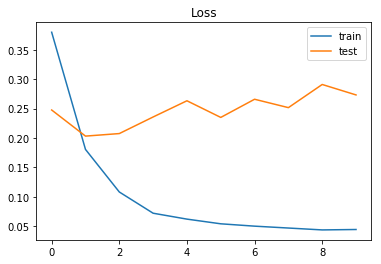

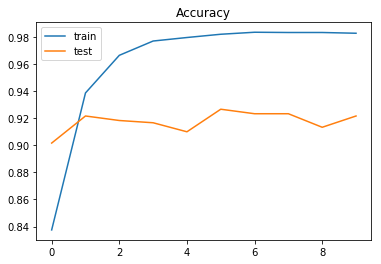

In [136]:
embedding_dim = 100
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, y_train,
                    epochs=10,
                    validation_data=(X_test, y_test),
                    batch_size=32)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();
plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show();

CNN - NADAM *OPTIMIZER*

Train on 5398 samples, validate on 600 samples
Epoch 1/30
5398/5398 [==============================] - 20s 4ms/step - loss: 0.3539 - acc: 0.8462 - val_loss: 0.2325 - val_acc: 0.9033
Epoch 2/30
5398/5398 [==============================] - 18s 3ms/step - loss: 0.1747 - acc: 0.9405 - val_loss: 0.1900 - val_acc: 0.9233
Epoch 3/30
5398/5398 [==============================] - 18s 3ms/step - loss: 0.0988 - acc: 0.9692 - val_loss: 0.2095 - val_acc: 0.9183
Epoch 4/30
5398/5398 [==============================] - 18s 3ms/step - loss: 0.0709 - acc: 0.9780 - val_loss: 0.2066 - val_acc: 0.9233
Epoch 5/30
5398/5398 [==============================] - 18s 3ms/step - loss: 0.0547 - acc: 0.9813 - val_loss: 0.2213 - val_acc: 0.9167
Epoch 6/30
5398/5398 [==============================] - 18s 3ms/step - loss: 0.0516 - acc: 0.9824 - val_loss: 0.2203 - val_acc: 0.9300
Epoch 7/30
5398/5398 [==============================] - 18s 3ms/step - loss: 0.0479 - acc: 0.9831 - val_loss: 0.2366 - val_acc: 0.9167
Epoch 8/

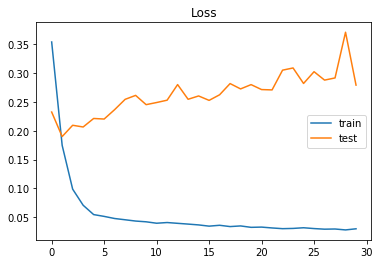

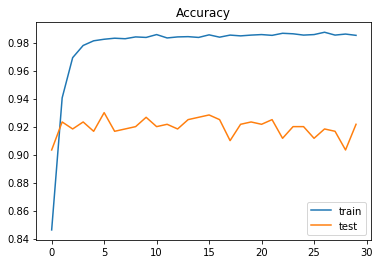

In [137]:
embedding_dim = 100
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.Nadam(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, y_train,
                    epochs=30,
                    validation_data=(X_test, y_test),
                    batch_size=32)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();
plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show();

**LSTM**

### LSTM - *ADAM*

Train on 5398 samples, validate on 600 samples
Epoch 1/20
5398/5398 [==============================] - 9s 2ms/step - loss: 0.5234 - acc: 0.7901 - val_loss: 0.5079 - val_acc: 0.7967
Epoch 2/20
5398/5398 [==============================] - 7s 1ms/step - loss: 0.5061 - acc: 0.7966 - val_loss: 0.5062 - val_acc: 0.7967
Epoch 3/20
5398/5398 [==============================] - 7s 1ms/step - loss: 0.5192 - acc: 0.7833 - val_loss: 0.5103 - val_acc: 0.7883
Epoch 4/20
5398/5398 [==============================] - 7s 1ms/step - loss: 0.5083 - acc: 0.7951 - val_loss: 0.5044 - val_acc: 0.7983
Epoch 5/20
5398/5398 [==============================] - 7s 1ms/step - loss: 0.5060 - acc: 0.7957 - val_loss: 0.5034 - val_acc: 0.7983
Epoch 6/20
5398/5398 [==============================] - 7s 1ms/step - loss: 0.5052 - acc: 0.7957 - val_loss: 0.5005 - val_acc: 0.7983
Epoch 7/20
5398/5398 [==============================] - 7s 1ms/step - loss: 0.5039 - acc: 0.7964 - val_loss: 0.5017 - val_acc: 0.7967
Epoch 8/20
5398

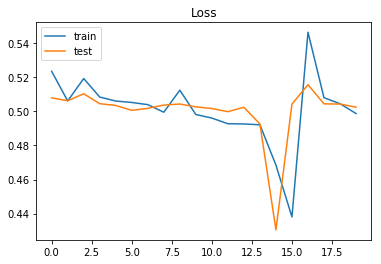

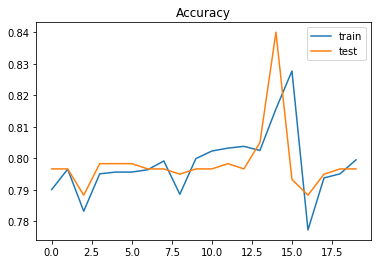

In [25]:
model = Sequential()
model.add(layers.Embedding(5000, 100, input_length=maxlen))
model.add(layers.SpatialDropout1D(0.2))
model.add(layers.CuDNNLSTM(100))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 20
batch_size = 32

history = model.fit(X_train, y_train,
                    epochs=epochs,
                    validation_data=(X_test, y_test),
                    batch_size=32)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();
plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show();

LSTM - NADAM *OPTIMIZER*

```
# This is formatted as code
```



Train on 5398 samples, validate on 600 samples
Epoch 1/20
5398/5398 [==============================] - 9s 2ms/step - loss: 0.6031 - acc: 0.7738 - val_loss: 0.6605 - val_acc: 0.7817
Epoch 2/20
5398/5398 [==============================] - 7s 1ms/step - loss: 0.6387 - acc: 0.7836 - val_loss: 0.6205 - val_acc: 0.7817
Epoch 3/20
5398/5398 [==============================] - 8s 1ms/step - loss: 0.6054 - acc: 0.7836 - val_loss: 0.5931 - val_acc: 0.7817
Epoch 4/20
5398/5398 [==============================] - 7s 1ms/step - loss: 0.5817 - acc: 0.7836 - val_loss: 0.5732 - val_acc: 0.7817
Epoch 5/20
5398/5398 [==============================] - 7s 1ms/step - loss: 0.5642 - acc: 0.7836 - val_loss: 0.5585 - val_acc: 0.7817
Epoch 6/20
5398/5398 [==============================] - 7s 1ms/step - loss: 0.5515 - acc: 0.7836 - val_loss: 0.5478 - val_acc: 0.7817
Epoch 7/20
5398/5398 [==============================] - 7s 1ms/step - loss: 0.5423 - acc: 0.7836 - val_loss: 0.5404 - val_acc: 0.7817
Epoch 8/20
5398

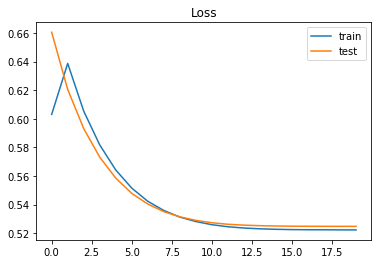

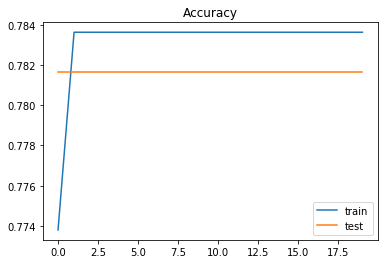

In [27]:
model = Sequential()
model.add(layers.Embedding(5000, 100, input_length=maxlen))
model.add(layers.SpatialDropout1D(0.2))
model.add(layers.CuDNNLSTM(100))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.Nadam(lr=0.001), metrics=['accuracy'])

epochs = 20
batch_size = 32

history = model.fit(X_train, y_train,
                    epochs=epochs,
                    validation_data=(X_test, y_test),
                    batch_size=32)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();
plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show();

 **Bidirectional LStM**






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 5398 samples, validate on 600 samples
Epoch 1/30





5398/5398 [==============================] - 25s 5ms/step - loss: 0.3214 - acc: 0.8609 - val_loss: 0.1877 - val_acc: 0.9267
Epoch 2/30
5398/5398 [==============================] - 18s 3ms/step - loss: 0.1689 - acc: 0.9379 - val_loss: 0.1663 - val_acc: 0.9367
Epoch 3/30
5398/5398 [==============================] - 17s 3ms/step - loss: 0.1136 - acc: 0.9618 - val_loss: 0.2142 - val_acc: 0.9167
Epoch 4/30
5398/5398 [==============================] - 17s 3ms/step - loss: 0.0867 - acc: 0.9692 - val_loss: 0.2570 - val_acc: 0.9200
Epoch 5/30
5398/5398 [==============================] - 16s 3ms/step - loss: 0.0609 - acc: 0.9796 - val_loss: 0.3003 - val_acc: 0.9200
Epoch 6/30
5398/5398 [==============================] - 17s 3ms/step - loss: 0.0459 - acc: 0.9839 - val_loss: 0.2989 - val_acc: 0.9067
Epoch 7/30
5398/5398 [==============

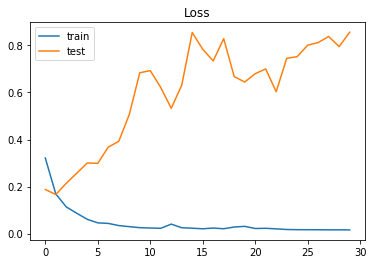

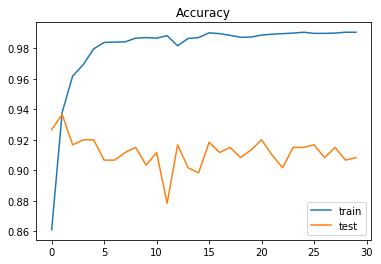

In [9]:
from keras.layers import Embedding,Input,Dense, LSTM,Dropout, Activation,Bidirectional,Reshape,Permute,Multiply,Flatten,Lambda,Layer,TimeDistributed,CuDNNLSTM
from keras.models import Model
input_ = Input(shape=(maxlen,))
model = Embedding(vocab_size,100,input_length=maxlen)(input_)
model =  Bidirectional (CuDNNLSTM (100,return_sequences=True),merge_mode='concat')(model)
model = TimeDistributed(Dense(100,activation='relu'))(model)
model = Flatten()(model)
model = Dense(100,activation='relu')(model)
output = Dense(1,activation='sigmoid')(model)
model = Model(input_,output)
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

epochs = 30
batch_size = 32

history = model.fit(X_train, y_train,
                    epochs=30,
                    validation_data=(X_test, y_test),
                    batch_size=32)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();
plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show();